In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
 pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
  

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import numpy as np
import pandas as pd
import gradio

In [ ]:
# from cv2.gapi import resize
labels = ["PNEUMONIA","NORMAL"]
img_size = 150
def get_data(data_dir):
  data=[]
  for label in labels:
    path = os.path.join(data_dir,label)
    class_num = labels.index(label)
    for img in os.listdir(path):
      try:
        img_arr = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        resized_arr = cv2.resize(img_arr,(img_size, img_size))
        data.append([resized_arr,class_num])
      except Exception as e:
        print(e)
  return np.array(data)



In [ ]:
train = get_data("//content/drive/MyDrive/sdp/archive/chest_xray/chest_xray/train")
test = get_data("/content/drive/MyDrive/sdp/archive/chest_xray/chest_xray/test")
val = get_data("/content/drive/MyDrive/sdp/archive/chest_xray/chest_xray/val")


<ipython-input-5-7b7152fd4b19>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in test:
  x_test.append(feature)
  y_test.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

In [ ]:
positives=[]
negatives = []
for i in range(len(y_train)):
  if y_train[i]:
    positives.append(x_train[i])
  else:
    negatives.append(x_train[i])


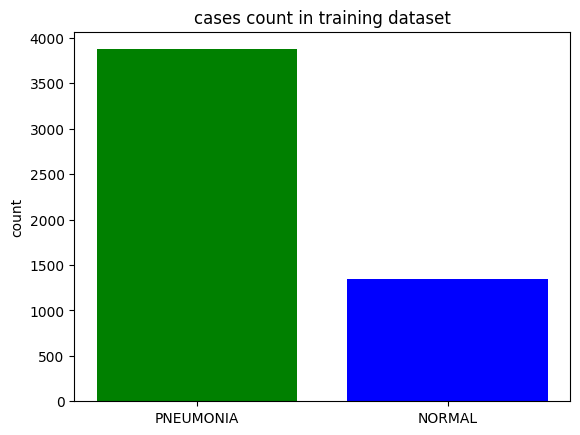

In [ ]:
plt.bar(labels,[len(negatives),len(positives)], color=["green","blue"])
plt.title("cases count in training dataset")
plt.ylabel("count")
plt.show()

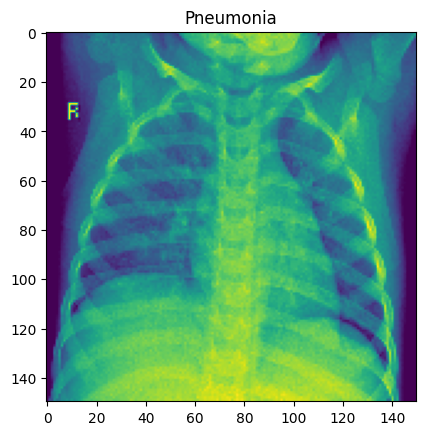

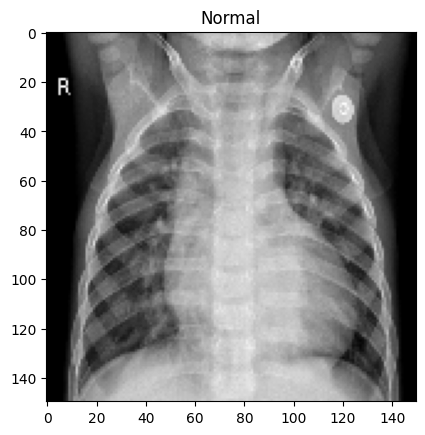

In [ ]:
plt.imshow(positives[0])
plt.title("Pneumonia")
plt.show()

plt.imshow(negatives[4], cmap = "gray")
plt.title("Normal")
plt.show()


In [ ]:
x_train = np.array(x_train)/255
x_test = np.array(x_test)/255
x_val = np.array(x_val)/255

In [ ]:
x_train = x_train.reshape(-1,img_size,img_size,1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1,img_size,img_size,1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1,img_size,img_size,1)
y_test = np.array(y_test)

In [ ]:
x_test[0].shape

(150, 150, 1)

In [ ]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_val = y_val.reshape(-1,1)

Data Augmentation


In [ ]:
  datagen = ImageDataGenerator(
          featurewise_center=False,
          samplewise_center=False,
          featurewise_std_normalization=False,
          samplewise_std_normalization=False,
          zca_whitening=False,
          rotation_range = 30,
          zoom_range = 0.2,
          width_shift_range = 0.1,
          height_shift_range = 0.1,
          horizontal_flip = True,
          vertical_flip = False )

  datagen.fit(x_train)

In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout (0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3), strides = 1, padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2, padding = 'same'))

model.add(Conv2D(128 , (3,3), strides = 1, padding = 'same' , activation = 'relu'))
model.add(Dropout (0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' ,  activation = 'relu'))
model.add(Dropout (0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())
model.add(Dense(units = 120 , activation = 'relu'))
model.add(Dropout (0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       2

In [ ]:
model.compile(optimizer = "rmsprop" ,
              loss =  'binary_crossentropy' ,
              metrics = ['accuracy'])

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience = 2,
                                            verbose=1,
                                            factor=0.3,
                                            min_lr=0.000001)

In [ ]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32),
                    epochs =2 ,
                    validation_data = datagen.flow(x_val, y_val),
                    callbacks = learning_rate_reduction)

Epoch 1/2
163/163 [==============================] - 442s 3s/step - loss: 0.3164 - accuracy: 0.8796 - val_loss: 34.9638 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/2
163/163 [==============================] - 442s 3s/step - loss: 0.2216 - accuracy: 0.9155 - val_loss: 49.5473 - val_accuracy: 0.5000 - lr: 0.0010


In [ ]:
model.save_weights('/content/drive/MyDrive/archive')

In [ ]:
print("Loss of the model is -" , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is", model.evaluate(x_test, y_test)[1] * 100, "%")

20/20 [==============================] - 13s 632ms/step - loss: 26.7271 - accuracy: 0.6250
Loss of the model is - 26.727088928222656
20/20 [==============================] - 13s 646ms/step - loss: 26.7271 - accuracy: 0.6250
Accuracy of the model is 62.5 %


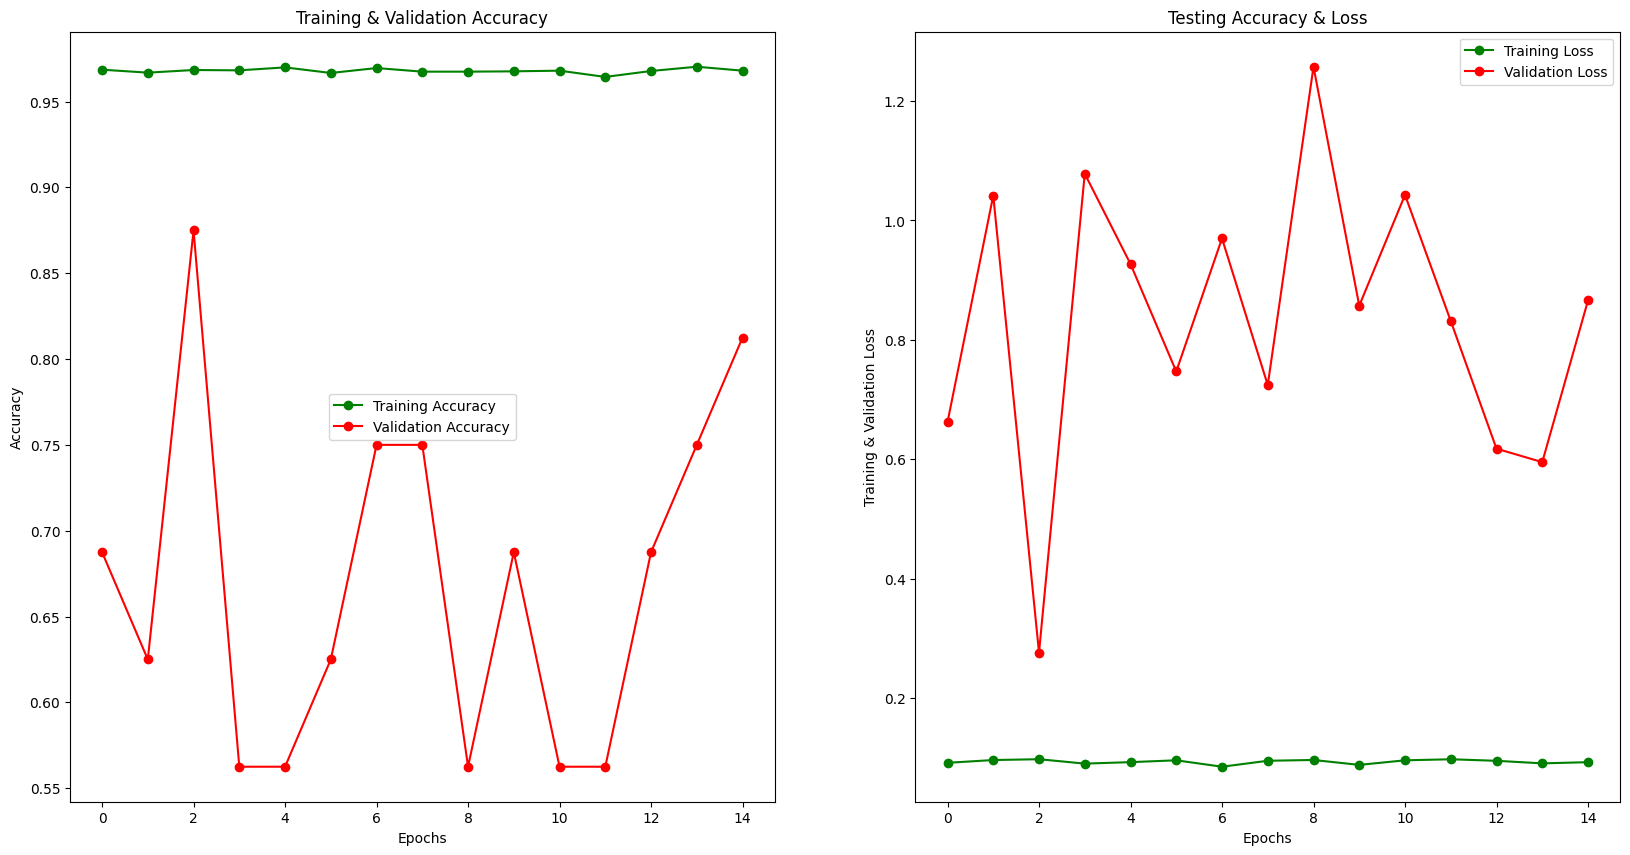

In [ ]:
epochs = list(range(15))
fig, ax = plt.subplots(1,2)
train_acc = history.history ['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history ['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs, train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs, val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss, 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
predictions = model.predict(x_test)
for i in range(len(predictions)):
    predictions[i] = 1 if predictions[i]>0.5 else 0

20/20 [==============================] - 12s 624ms/step


In [ ]:
print(classification_report(y_test,
                            predictions,
                            target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.93      0.92      0.93       390
   Normal (Class 1)       0.87      0.88      0.88       234

           accuracy                           0.91       624
          macro avg       0.90      0.90      0.90       624
       weighted avg       0.91      0.91      0.91       624



Confusion Matrix

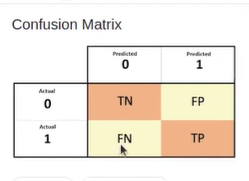

In [ ]:
cm = confusion_matrix(y_test, predictions)
cm = pd.DataFrame(cm, index = ['0','1'] , columns = ['0', '1'])
cm

,0,1
0,360,30
1,28,206


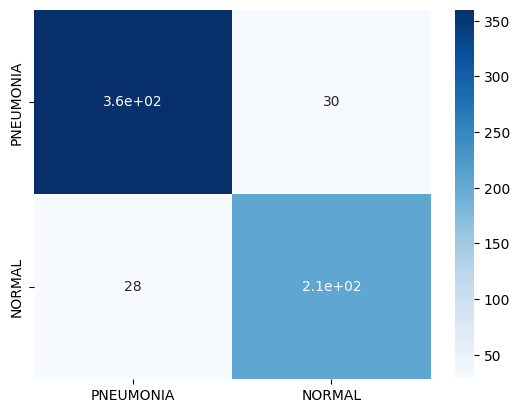

In [ ]:
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels = labels , yticklabels = labels)
plt.show()

In [ ]:
def pneumoniaPrediction(img):
    img = np.array(img)/255
    img = img.reshape(-1, 150, 150, 1)
    isPneumonic = model.predict(img)[0]
    imgClass = "Normal" if isPneumonic<0.5 else "Pneumonic"
    return imgClass

In [ ]:
pr = model.predict(x_test)
for i in range(len(pr)):
    if pr[i]>8.5:
        pr[i]=1
    else:
        pr[i]=0

20/20 [==============================] - 22s 1s/step


In [ ]:
img = gradio.inputs.Image(shape=(150, 150))
label = gradio.outputs.Label(num_top_classes=1)

<ipython-input-55-72134a9adc43>:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  img = gradio.inputs.Image(shape=(150, 150))
<ipython-input-55-72134a9adc43>:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  img = gradio.inputs.Image(shape=(150, 150))
<ipython-input-55-72134a9adc43>:2: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gradio.outputs.Label(num_top_classes=1)
<ipython-input-55-72134a9adc43>:2: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gradio.outputs.Label(num_top_classes=1)


In [ ]:
interface = gradio.Interface(fn = pneumoniaPrediction,
                             title = "Pneumonia Detection using Chest X-Ray",
                             inputs = img,
                             outputs = label,
                             interpretation = "default")
interface.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://cdd5220284c4b28e60.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://cdd5220284c4b28e60.gradio.live
